In [1]:
from matplotlib import pyplot as pl
import imageio
import numpy as np
import os
import pickle

In [2]:
ROOT_PREFIX = "data_venus/arecibo_radar/pds-geosciences.wustl.edu/venus/arcb_nrao-v-rtls_gbt-3-delaydoppler-v1/vrm_90xx/"
DATA_PREFIX = ROOT_PREFIX + "data/"

In [3]:
def process(img_in, percentile=99):
    img = img_in.copy()
    img = np.abs(img)
    img -= img.min()
    img /= img.max()
    percentile_thresh = np.percentile(img.ravel(), percentile)
    img = np.where(img > percentile_thresh, percentile_thresh, img)
    return img

In [4]:
import imageio

def imwrite(filename, img):
    img -= img.min()
    img /= (img.max() / 255)
    imageio.imwrite(filename, img.astype(np.uint8))

In [5]:
#basename = "20200524_182906"
basename = "20150812_155242"
scp_img = np.memmap(DATA_PREFIX + "venus_scp_" + basename + ".img", dtype="<F", shape=(8191, 8192), mode="r")  # 'F' is complex single-precision: a complex number type of 2 32-bit precision floating-point numbers.
ocp_img = np.memmap(DATA_PREFIX + "venus_ocp_" + basename + ".img", dtype="<F", shape=(8191, 8192), mode="r")  # 'F' is complex single-precision: a complex number type of 2 32-bit precision floating-point numbers.

In [6]:
#scp_img_real = scp_img.real
#scp_img_imag = scp_img.imag
scp_img_abs = np.abs(scp_img)
scp_img_abs = np.roll(scp_img_abs, -29, axis=0)

In [ ]:
pl.plot(np.sum(scp_img_abs[:, :100], axis=1))

In [ ]:
pl.plot(np.sum(scp_img_abs[8000:8100, :], axis=0), 'r-')

In [7]:
#scp_img_real_99 = process(scp_img_real)
#scp_img_imag_99 = process(scp_img_imag)
scp_img_abs_99 = process(scp_img_abs)

In [16]:
#imwrite('scp_img_real_99.png', scp_img_real_99)
#imwrite('scp_img_imag_99.png', scp_img_imag_99)
imwrite('scp_img_abs_99.png', scp_img_abs_99)

## OCP

In [10]:
ocp_img_abs = np.abs(ocp_img)
ocp_img_abs = np.roll(ocp_img_abs, -29, axis=0)

In [15]:
# Correct by baud rate, which determines range, which determines angle of reflection
#echo_power = 1 - np.cos(np.linspace(0, np.pi / 2, ocp_img_abs.shape[0])) + 1e-1  # Add a litte to avoid zero.
echo_power = 10 / np.linspace(1, 1000, ocp_img_abs.shape[0]) + 0.04
ocp_img_abs_pow = (ocp_img_abs.T / echo_power).T
#imwrite('ocp_img_abs_pow.png', ocp_img_abs_pow)

In [ ]:
#pl.plot(np.log(np.sum(ocp_img_abs[:, :100], axis=1)), 'r-')
#pl.plot(np.log(10 / np.linspace(1, 1000, ocp_img_abs.shape[0]) + 0.04))

pl.plot(np.sum(ocp_img_abs[:, :100], axis=1), 'r-')
pl.plot(np.sum(ocp_img_abs_pow[:, :100], axis=1), 'g-')

In [13]:
ocp_img_abs_pow_99 = process(ocp_img_abs_pow)
imwrite('ocp_img_abs_pow_99.png', ocp_img_abs_pow_99)

# SUM and BLEND for optimal appearance

In [14]:
sum_img_abs = scp_img_abs_99 + ocp_img_abs_pow_99
sum_img_abs_99 = process(sum_img_abs)
imwrite('sum_img_abs_99.png', sum_img_abs_99)

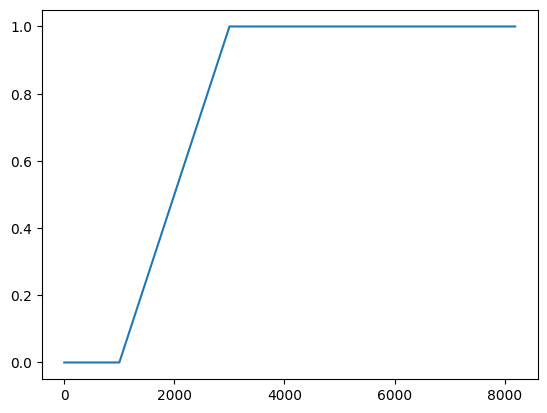

In [22]:
blend = np.concatenate((np.zeros(1000), np.linspace(0, 1, 2000), np.ones(5191)))
pl.plot(blend)
blend_img_abs_99 = (ocp_img_abs_pow_99.T * blend + scp_img_abs_99.T * (1 - blend)).T
imwrite('blend_img_abs_99.png', blend_img_abs_99)

# Map projections

In [4]:
import numpy as np

def goldenSpiralGrid(n_points):  # aka Fibonacci spiral or lattice
    # See http://extremelearning.com.au/how-to-evenly-distribute-points-on-a-sphere-more-effectively-than-the-canonical-fibonacci-lattice/#more-3069
    # This function is good for *area* accuracy. There are better constants for *distance* accuracy.
    i = np.arange(0, n_points, dtype=np.float32) + 0.5
    lon = np.pi * (1 + 5**0.5) * i
    lat = np.arcsin(1 - 2 * i / n_points)
    return lon, lat

In [6]:
# If we want to have approximately 1 sq km cells across the surface of Venus, we need
#   number of points = surface_area in km2
#                    = 4 pi 6051.8**2
n_points = int(4 * np.pi * 6052**2)
print(f"{n_points=}")
lon, lat = goldenSpiralGrid(n_points)

n_points=460264736


In [1]:
lon

NameError: name 'lon' is not defined